In [ ]:
import pathlib
import PIL
import PIL.Image
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import glob

: 

In [ ]:
from glob import glob

: 

In [ ]:
data_dir = 'cats_and_dogs_filtered'
data_dir = pathlib.Path(data_dir)
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
val_cats_dir = os.path.join(val_dir, 'cats')
val_dogs_dir = os.path.join(val_dir, 'dogs')

: 

In [5]:
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(val_cats_dir)))
print(len(os.listdir(val_dogs_dir)))

1000
1000
500
500


In [6]:
cats = list(data_dir.glob('*/cats/*'))


In [7]:
cats[1]

PosixPath('cats_and_dogs_filtered/train/cats/cat.946.jpg')

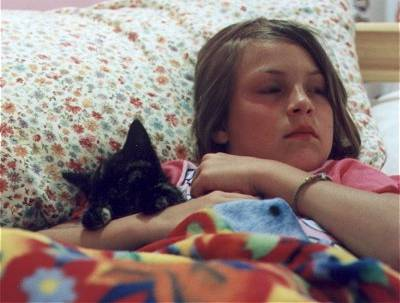

In [8]:
PIL.Image.open(cats[2])

In [15]:
batch_size = 32
img_height = 180
img_width = 180

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=batch_size,
                                             image_size=(img_height, img_width))
                                             
validation_dataset = image_dataset_from_directory(val_dir,
                                                  shuffle=True,
                                                  batch_size=batch_size,
                                                  image_size=(img_height, img_width))

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [16]:
class_names = train_dataset.class_names
print(class_names)

['cats', 'dogs']


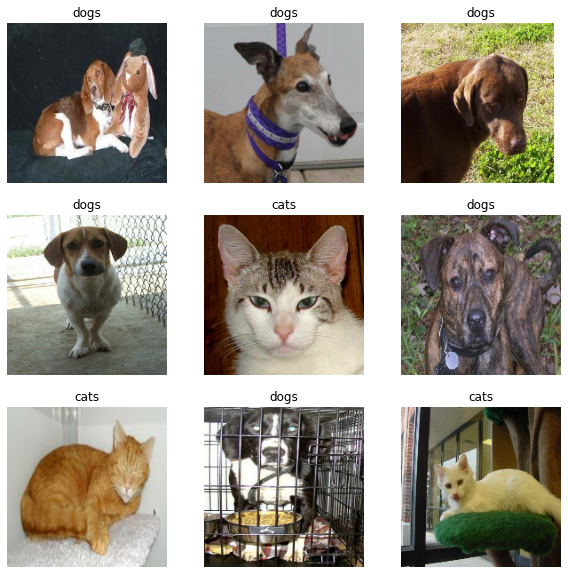

In [17]:
class_names = train_dataset.class_names

plt.figure(figsize=(10,10))
for images, label in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")

In [18]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

In [20]:
num_classes = 2
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
    ])

model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

In [21]:
epochs=10
history = model.fit(train_dataset,  
          validation_data=validation_dataset,
          epochs=epochs,) 

Epoch 1/10


2022-05-02 19:52:55.826169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 0.7302 - accuracy: 0.5415

2022-05-02 19:53:04.594469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 10s 153ms/step - loss: 0.7302 - accuracy: 0.5415 - val_loss: 0.6742 - val_accuracy: 0.6150
Epoch 2/10
63/63 [==============================] - 9s 141ms/step - loss: 0.6431 - accuracy: 0.6485 - val_loss: 0.6432 - val_accuracy: 0.6650
Epoch 3/10
63/63 [==============================] - 9s 140ms/step - loss: 0.6012 - accuracy: 0.6810 - val_loss: 0.6164 - val_accuracy: 0.6580
Epoch 4/10
63/63 [==============================] - 9s 139ms/step - loss: 0.5528 - accuracy: 0.7240 - val_loss: 0.5905 - val_accuracy: 0.6840
Epoch 5/10
63/63 [==============================] - 10s 149ms/step - loss: 0.4760 - accuracy: 0.7735 - val_loss: 0.5594 - val_accuracy: 0.7230
Epoch 6/10
63/63 [==============================] - 9s 144ms/step - loss: 0.4246 - accuracy: 0.8015 - val_loss: 0.5799 - val_accuracy: 0.7300
Epoch 7/10
63/63 [==============================] - 9s 140ms/step - loss: 0.3564 - accuracy: 0.8485 - val_loss: 0.6040 - val_accuracy: 0.7080
Epoch 8/10
63/6

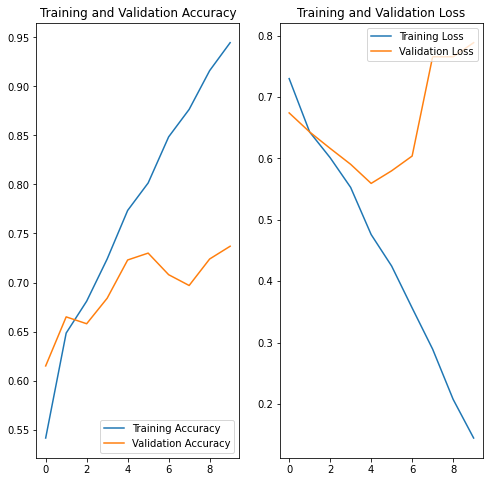

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
with tf.device('/cpu:0'):
  data_augmentation = keras.Sequential(
    [
      layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                  input_shape=(img_height, 
                                                                img_width,
                                                                3)),
      layers.experimental.preprocessing.RandomRotation(0.1),
      layers.experimental.preprocessing.RandomZoom(0.1),
    ]
  )

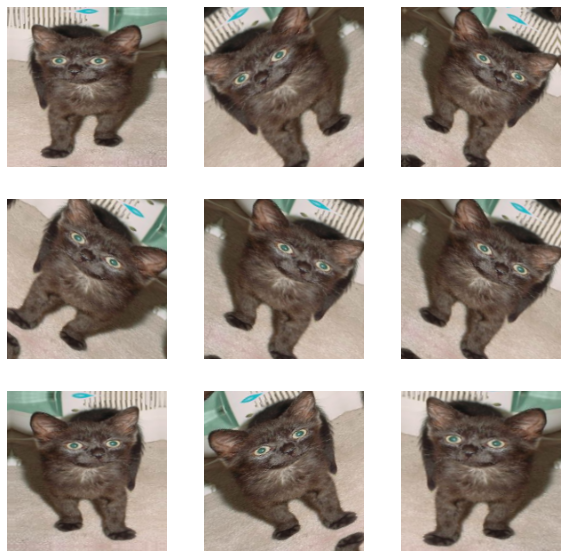

In [29]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [30]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 15
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

Epoch 1/15


2022-05-02 20:35:15.025172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 0.6925 - accuracy: 0.5600

2022-05-02 20:35:25.574569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 13s 183ms/step - loss: 0.6925 - accuracy: 0.5600 - val_loss: 0.6461 - val_accuracy: 0.6300
Epoch 2/15
63/63 [==============================] - 12s 182ms/step - loss: 0.6435 - accuracy: 0.6370 - val_loss: 0.6357 - val_accuracy: 0.6000
Epoch 3/15
63/63 [==============================] - 11s 173ms/step - loss: 0.6085 - accuracy: 0.6770 - val_loss: 0.5793 - val_accuracy: 0.6900
Epoch 4/15
63/63 [==============================] - 11s 176ms/step - loss: 0.6131 - accuracy: 0.6615 - val_loss: 0.5923 - val_accuracy: 0.6820
Epoch 5/15
63/63 [==============================] - 11s 173ms/step - loss: 0.5758 - accuracy: 0.7030 - val_loss: 0.5689 - val_accuracy: 0.6970
Epoch 6/15
63/63 [==============================] - 11s 174ms/step - loss: 0.5448 - accuracy: 0.7250 - val_loss: 0.5498 - val_accuracy: 0.7270
Epoch 7/15
63/63 [==============================] - 11s 173ms/step - loss: 0.5358 - accuracy: 0.7300 - val_loss: 0.5559 - val_accuracy: 0.7180
Epoch 8/15

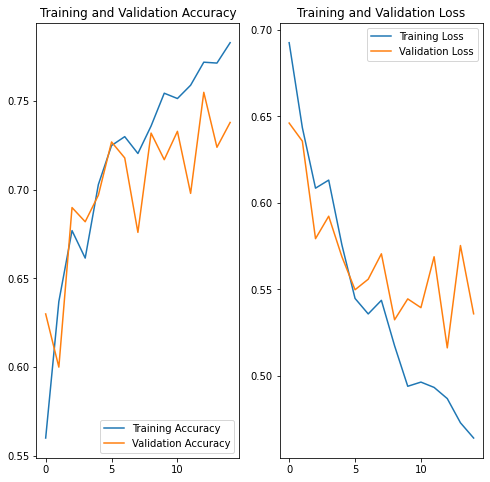

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predict_img_path = '/Users/ganghaeseong/Desktop/냐옹/DSCF1551.JPG'
img = keras.preprocessing.image.load_img(
    predict_img_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

: 